In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import wafermap

In [2]:
wafer_radius=150
edge_exclusion = 3

In [3]:
def create_wafermap(wafer_radius,edge_exclusion,export=False):
    """
    Creates a wafer map with specified radius and edge exclusion parameters.

    Parameters:
    - wafer_radius (int): The radius of the wafer map to create.
    - edge_exclusion (int): The width of the edge exclusion zone. Points within this zone from the edge are excluded.
    - export (bool, optional): If True, the resulting wafer map is exported to a CSV file. Default is False.

    Returns:
    - DataFrame: A pandas DataFrame containing X and Y coordinate values as two columns, representing points within the wafer radius and outside the edge exclusion zone.
    
    Notes:
    - The function iterates over a square grid within the specified wafer radius and excludes points outside the circular wafer boundary and within the edge exclusion zone.
    - If `export` is set to True, the DataFrame is saved to 'Wafermap2.csv' in the current directory.
    """

    data = []
    X=[]
    Y=[]
    index=[]
    count=0

    for i in range(-1 *wafer_radius,wafer_radius,15):
        for j in range(-1 *wafer_radius,wafer_radius,15):
            X.append(i)
            Y.append(j)
            data.append([i,j])
            count = count + 1
            index.append(count)

    #measurements = np.round(np.random.randn(len(data))*10,2)

    #Remove points outside the circle
    df = pd.DataFrame(index=index,columns=['X','Y'], data=data)
    df['radial_distance'] = np.round(np.sqrt(df['X']**2 + df['Y']**2),2)

    #Remove points within the edge exclusion zone
    df = df[df['radial_distance'] <= (150 - edge_exclusion)]
    df = df.reset_index().drop(axis=1,columns=['index','radial_distance'])

    if export:
        #Export wafer map to csv
        df.to_csv('Wafermap2.csv',index=False,encoding='UTF-8')

    return df

def generate_measurements(data,meas_ratio=0.5):
    """
    Generates random measurement values for a given set of wafer map data points.

    Parameters:
    - data (DataFrame): A pandas DataFrame containing at least X and Y coordinates of wafer map points.
    - meas_ratio (float, optional): The ratio of the total number of points to generate measurements for. Default is 0.5.

    Returns:
    - DataFrame: The input DataFrame augmented with a 'Value' column containing generated measurement values for each point.
    
    Notes:
    - The measurement values are generated as random Gaussian noise scaled by a factor of 10, rounded to 2 decimal places.
    - The 'Value' column is populated for all rows in the DataFrame, not just a subset defined by `meas_ratio`.
    """

    num_meas_points = meas_ratio * len(data)
    measurements = np.round(np.random.randn(len(data))*10,2)
    data['Value'] = measurements

    return data
    


def plot_wafermap(df, value_column=None, quadrant_lines=False,show_coordinates=None):
    """
    Plots a wafer map using matplotlib with optional enhancements like quadrant lines and coordinate annotations.

    Parameters:
    - df (DataFrame): A pandas DataFrame containing X and Y coordinates and optionally measurement values for plotting.
    - value_column (str, optional): The name of the column containing measurement values to use for color-coding points. If None, all points are plotted in the same color. Default is None.
    - quadrant_lines (bool, optional): If True, adds lines demarcating the quadrants of the wafer map. Default is False.
    - show_coordinates (str, optional): Controls the display of coordinates as text annotations on the plot. Can be 'All' to annotate all points, 'Meas_only' to annotate only points with measurement values, or None to skip annotations. Default is None.

    Returns:
    - None: The function creates and shows a matplotlib plot but does not return any value.
    
    Notes:
    - The function draws a circle to represent the wafer boundary and plots points within this boundary based on the DataFrame.
    - If `value_column` is provided, points are color-coded based on their measurement values, and a colorbar is displayed.
    - The optional `show_coordinates` parameter allows for detailed inspection of points by displaying their (X, Y) coordinates directly on the plot.
    """

    fig = plt.figure(figsize=(12,10),dpi=200)
    ax = fig.add_subplot(1, 1, 1)

    circ = plt.Circle((0, 0), radius=150,fill=None)
    ax.add_patch(circ)

    #plt.legend()
    if value_column:        
        plt.scatter(x=df['X'],y=df['Y'],c=df[value_column])

    else:
        plt.scatter(x=df['X'],y=df['Y'])
    
    if quadrant_lines:
        ax.hlines(y=0,xmin=-150,xmax=150)
        ax.vlines(x=0,ymin=-150,ymax=150)

    if show_coordinates == 'All':
        for (xi, yi) in zip(df['X'].values,df['Y'].values):
            plt.text(xi, yi, (xi,yi), va='top', ha='center')
    if show_coordinates == 'Meas_only':
        
        for (xi, yi) in zip(df[df[value_column].notnull()]['X'].values, 
                        df[df[value_column].notnull()]['Y'].values):
            plt.text(xi, yi, (xi,yi), va='top', ha='center',size=6)
    else:
        pass

    plt.colorbar()
    plt.show()

In [4]:
df = create_wafermap(wafer_radius,edge_exclusion)
df = generate_measurements(df)
df

,X,Y,Value
0,-135,-45,1.99
1,-135,-30,-8.55
2,-135,-15,-2.17
3,-135,0,1.41
4,-135,15,-10.27
...,...,...,...
288,135,-15,2.26
289,135,0,8.32
290,135,15,-5.53
291,135,30,-9.84


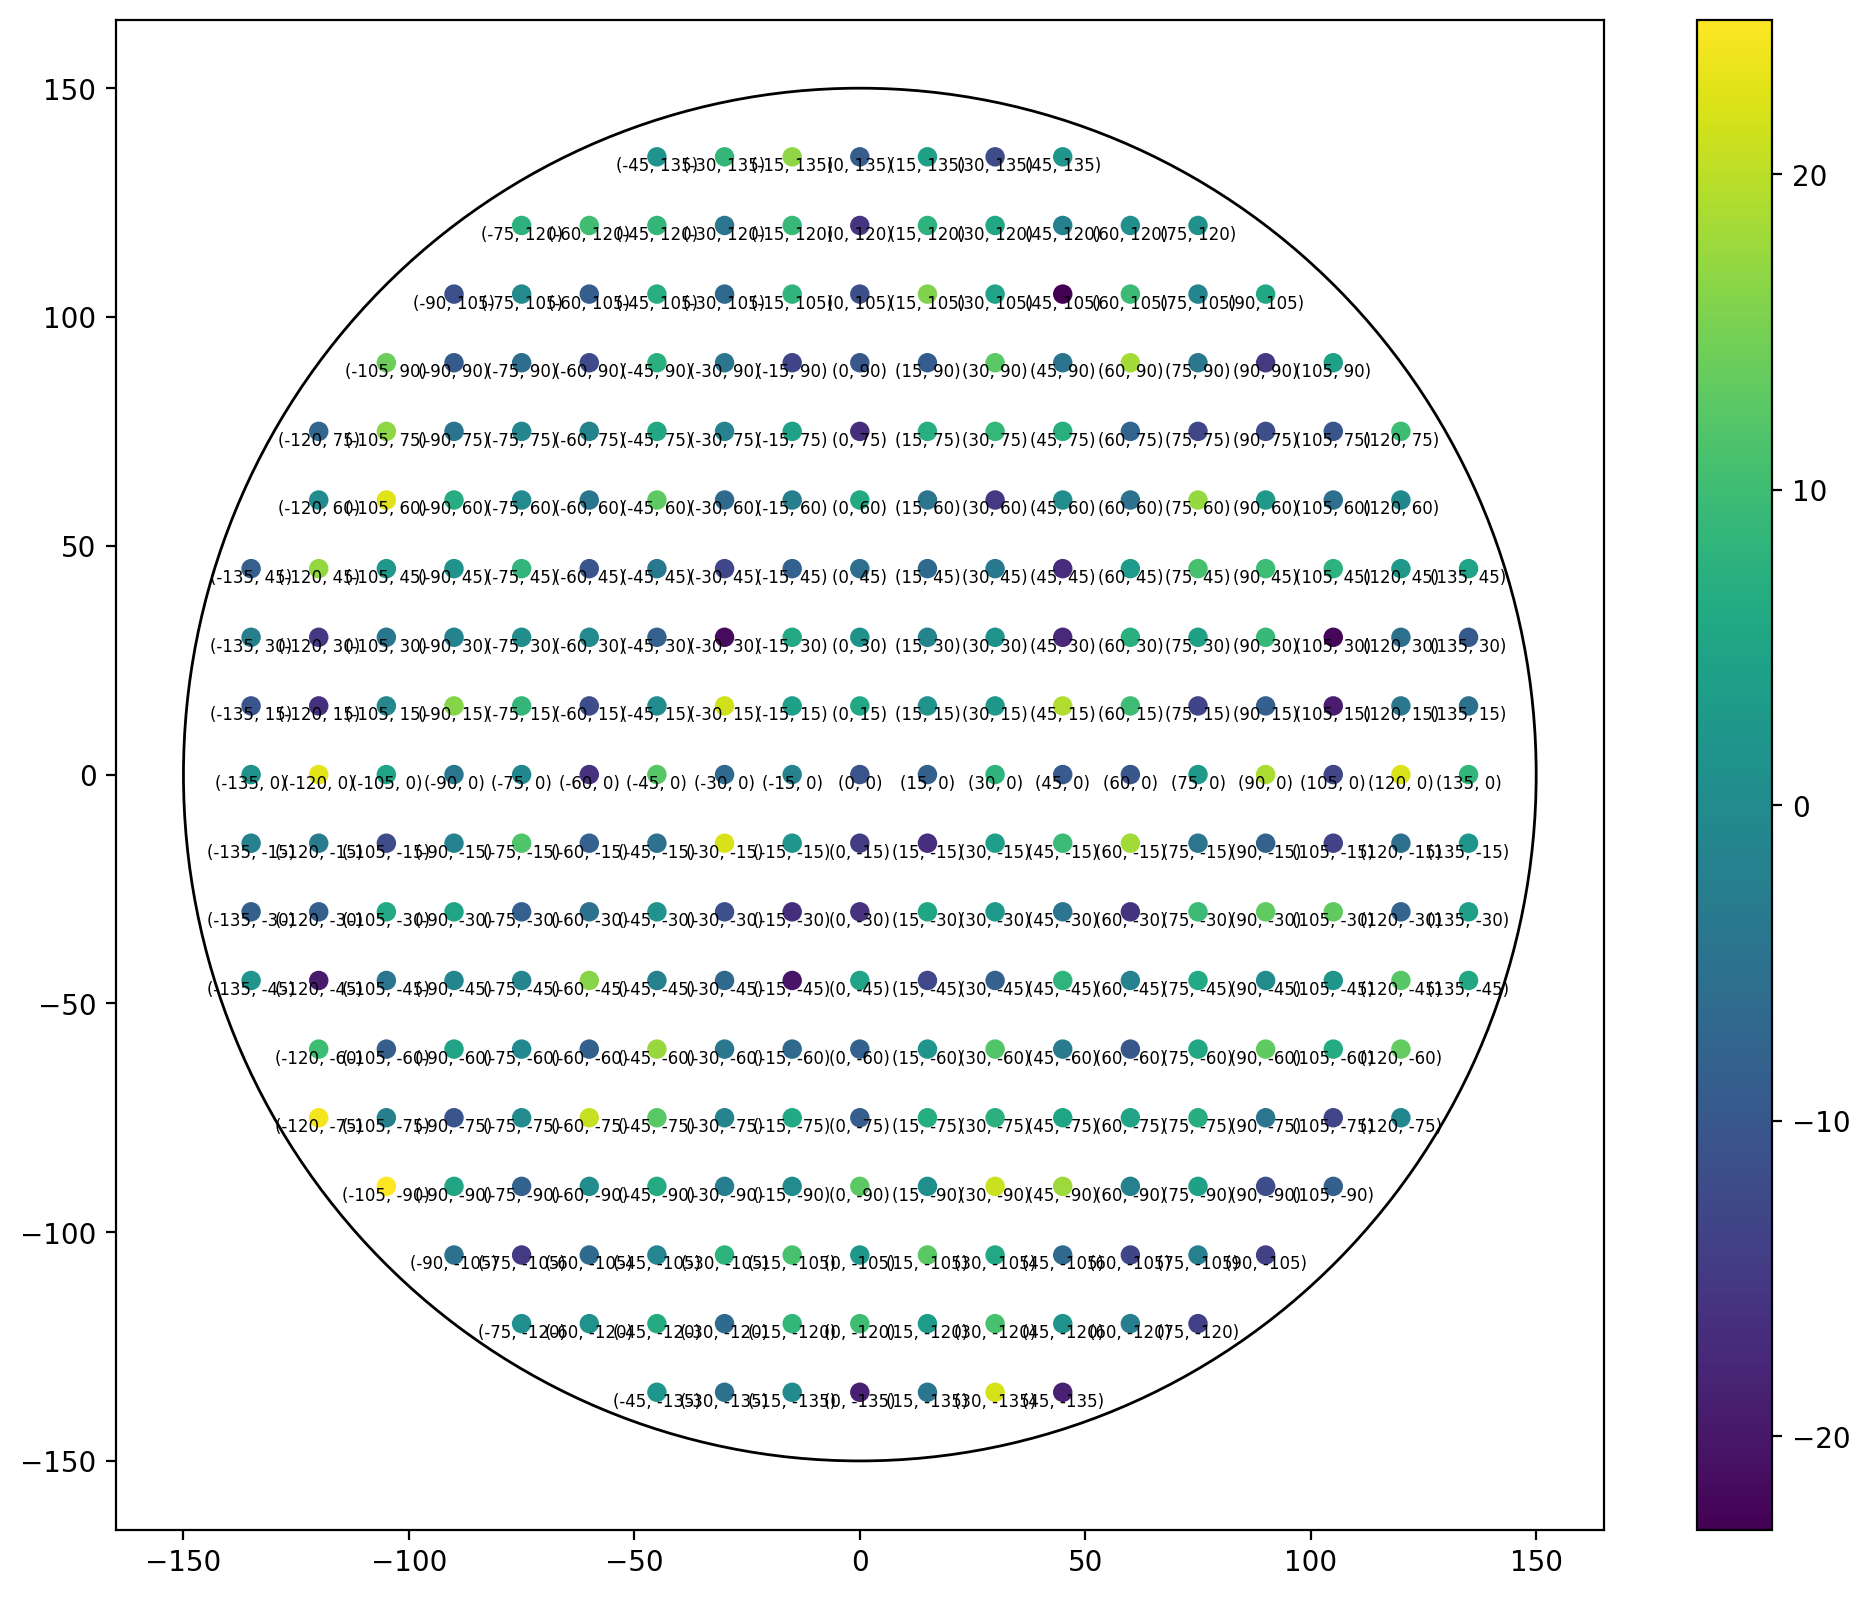

In [5]:
plot_wafermap(df,value_column='Value',show_coordinates='Meas_only')